# Introduction to Computational Science
# Assignment 2

## Gillespie Algorithm

1. Generate two random numbers between 0 and 1
2. Estimate time until next event based on cumulative rates of all possible events.
3. Convert event rates into probabilities by randomly selecting one of these events.
4. Repeat this process to iterate the model through time.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

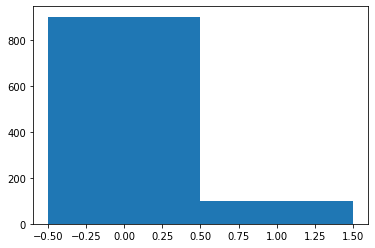

In [5]:
# Initialize variables
c1 = 0.1
event1 = 5
event2 = 10
reactiontime = 0
reactionnumber = 0

# a1 = X1*X2*c1
a0 = event1*event2*c1
a = np.array([event1*event2*c1])

# Calculate the rate at which any event occurs.
Rtotal = sum(a)

def get_reactiontime(a0, a, reactiontime, reactionnumber, event1, event2):
    """
    Choose the next time and event
    """
  
    # Generate two random numbers between 0 and 1.
    random1 = np.random.rand()
    random2 = np.random.rand()

    # Determine the rate at which an event occurs.
    # First, get reaction time.

    # Find the increment in T
    T = (1 / Rtotal) * np.log(1 / random1)

    # Get next reaction time
    next_event = 0
    N = random2 * a0 - a[next_event]
    
    while N > 0:
        next_event += 1
        N = N - a[next_event]

    # Calculate next reaction time
    reactiontime = reactiontime + T

    reactionnumber += 1

    # Update events
    event1 += 1
    event2 -= 1
    
    return reactiontime, next_event



def test(a):
    a0 = sum(a)
    
    r = np.zeros((1000,1))

    for i in range(1000):
        res = get_reactiontime(a0,a, reactiontime, reactionnumber, event1, event2)
        r[i] = res[1]
    
    # histogram the reactions chosen
    plt.hist(r, np.array([-0.5,0.5,1.5]))
    

a = np.array([9000*0.01, 10*1])
test(a)
plt.show()
